In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import seaborn as sns
import geopandas as gpd
import tqdm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rcParams['axes.axisbelow'] = True

In [2]:
# Get the absolute path of the parent directory
# parent_dir = str(Path(__file__).resolve().parent.parent)

parent_dir = str(Path().cwd().parent)

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now you can import the module as if it was in the same directory
import utils.aadt_predictor as ap

### Load data

In [3]:
HPMS_DIR = Path('../../data/processed_data/HPMS')
RANDOM_STATE = None
RESPONSE_VARS = ['AADT_MDV', 'AADT_HDV']
RF_PREDICTOR_VARS = ["STATEFP", "COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]

predictor = ap.AADTPredictor(HPMS_DIR / 'hpms_aadt_subset.csv', None, random_state = RANDOM_STATE)

Loading data from ..\..\data\processed_data\HPMS\hpms_aadt_subset.csv


c:\Users\achawla1\Desktop\work\NearRoadExposure\scripts\utils\aadt_predictor.py:37: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_full = pd.read_csv(self.data_path)


Full Data loaded successfully: 6598607 rows and 17 columns.
Pre-processing data...
ERROR: The data could not be subsetted. [None]
ERROR: The data could not be loaded. 'NoneType' object has no attribute 'shape'


In [4]:
ERROR_SCOPE = np.concatenate([np.arange(0, 0.01, 0.001), np.arange(0.01, 0.1, 0.005)])

In [6]:
results_AADT_perturb = []

for response_var in RESPONSE_VARS:

    predictor.response_var = response_var
    predictor.subset_train_data()

    for error in tqdm.tqdm(ERROR_SCOPE):

        for run in range(5):
            
            predictor.split_data(RF_PREDICTOR_VARS, state_fips= None, test_size=0.2)
            predictor.initialize_model('Random Forest', n_jobs = -1)

            # perturb total AADT
            predictor.X_train['AADT'] = predictor.X_train['AADT'] * (1 +  np.random.normal(-error, error, predictor.X_train.shape[0]))
            predictor.X_test['AADT'] = predictor.X_test['AADT'] * (1 +  np.random.normal(-error, error, predictor.X_test.shape[0]))

            predictor.fit_model()

            y_pred = predictor.model.predict(predictor.X_test)

            r2 = r2_score(predictor.y_test, y_pred)
            mse = mean_squared_error(predictor.y_test, y_pred)
            mae = mean_absolute_error(predictor.y_test, y_pred)

            results_AADT_perturb.append({
                'response_var': response_var,
                'error': error,
                'r2': r2,
                'mse': mse,
                'mae': mae,
                'run': run
            })

Training Data subsetted successfully with AADT_MDV: 4766630 rows and 17 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...


  0%|          | 0/28 [00:00<?, ?it/s]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  4%|▎         | 1/28 [23:28<10:33:43, 1408.28s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  7%|▋         | 2/28 [50:55<11:11:09, 1548.81s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 11%|█         | 3/28 [1:18:03<11:00:24, 1584.99s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 14%|█▍        | 4/28 [1:45:23<10:42:36, 1606.51s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 18%|█▊        | 5/28 [2:12:52<10:21:49, 1622.16s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 21%|██▏       | 6/28 [2:40:35<9:59:50, 1635.95s/it] 

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 25%|██▌       | 7/28 [3:08:34<9:37:31, 1650.07s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 29%|██▊       | 8/28 [3:36:36<9:13:21, 1660.08s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 32%|███▏      | 9/28 [4:04:55<8:49:32, 1672.22s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 36%|███▌      | 10/28 [4:33:07<8:23:33, 1678.50s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 39%|███▉      | 11/28 [5:01:31<7:57:45, 1686.23s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 43%|████▎     | 12/28 [5:30:30<7:33:55, 1702.24s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 46%|████▋     | 13/28 [5:59:31<7:08:30, 1714.05s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 50%|█████     | 14/28 [6:28:30<6:41:42, 1721.61s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 54%|█████▎    | 15/28 [7:00:32<6:26:03, 1781.83s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 57%|█████▋    | 16/28 [7:35:01<6:13:41, 1868.45s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 61%|██████    | 17/28 [8:06:30<5:43:39, 1874.53s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 64%|██████▍   | 18/28 [8:38:22<5:14:19, 1885.91s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 68%|██████▊   | 19/28 [9:07:50<4:37:35, 1850.56s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 71%|███████▏  | 20/28 [9:37:59<4:05:02, 1837.80s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 75%|███████▌  | 21/28 [10:07:30<3:32:05, 1817.90s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 79%|███████▊  | 22/28 [10:37:08<3:00:35, 1805.89s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 82%|████████▏ | 23/28 [11:07:00<2:30:08, 1801.62s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 86%|████████▌ | 24/28 [11:36:55<1:59:58, 1799.65s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 89%|████████▉ | 25/28 [12:06:10<1:29:18, 1786.25s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 93%|█████████▎| 26/28 [12:35:46<59:26, 1783.18s/it]  

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 96%|█████████▋| 27/28 [13:05:12<29:38, 1778.04s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


100%|██████████| 28/28 [13:34:26<00:00, 1745.25s/it]


Training Data subsetted successfully with AADT_HDV: 4766451 rows and 17 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...


  0%|          | 0/28 [00:00<?, ?it/s]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  4%|▎         | 1/28 [19:38<8:50:08, 1178.09s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  7%|▋         | 2/28 [43:21<9:32:56, 1322.18s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 11%|█         | 3/28 [1:07:20<9:33:13, 1375.75s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 14%|█▍        | 4/28 [1:31:25<9:21:11, 1402.97s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 18%|█▊        | 5/28 [1:55:49<9:06:15, 1425.01s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 21%|██▏       | 6/28 [2:19:48<8:44:11, 1429.63s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 25%|██▌       | 7/28 [2:44:29<8:26:17, 1446.54s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 29%|██▊       | 8/28 [3:09:06<8:05:27, 1456.40s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 32%|███▏      | 9/28 [3:34:12<7:46:06, 1471.90s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 36%|███▌      | 10/28 [3:59:28<7:25:39, 1485.54s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 39%|███▉      | 11/28 [4:24:44<7:03:28, 1494.63s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 43%|████▎     | 12/28 [4:49:51<6:39:34, 1498.41s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 46%|████▋     | 13/28 [5:15:06<6:15:54, 1503.62s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 50%|█████     | 14/28 [5:41:34<5:56:45, 1528.94s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 54%|█████▎    | 15/28 [6:09:24<5:40:28, 1571.42s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 57%|█████▋    | 16/28 [6:36:21<5:17:02, 1585.24s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 61%|██████    | 17/28 [7:05:17<4:58:56, 1630.59s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 64%|██████▍   | 18/28 [7:33:46<4:35:42, 1654.23s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 68%|██████▊   | 19/28 [8:03:10<4:13:04, 1687.22s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 71%|███████▏  | 20/28 [8:31:16<3:44:52, 1686.59s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 75%|███████▌  | 21/28 [8:58:44<3:15:27, 1675.30s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 79%|███████▊  | 22/28 [9:26:27<2:47:08, 1671.35s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 82%|████████▏ | 23/28 [9:55:28<2:21:01, 1692.30s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 86%|████████▌ | 24/28 [10:23:04<1:52:05, 1681.41s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 89%|████████▉ | 25/28 [10:50:24<1:23:27, 1669.07s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 93%|█████████▎| 26/28 [11:20:05<56:45, 1702.76s/it]  

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 96%|█████████▋| 27/28 [11:47:37<28:07, 1687.29s/it]

Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


100%|██████████| 28/28 [12:15:21<00:00, 1575.76s/it]


In [16]:
# plot r2 over errors
df_Y = pd.DataFrame(results_AADT_perturb)
df_Y['rmse'] = np.sqrt(df_Y['mse'])

<AxesSubplot: xlabel='error', ylabel='rmse'>

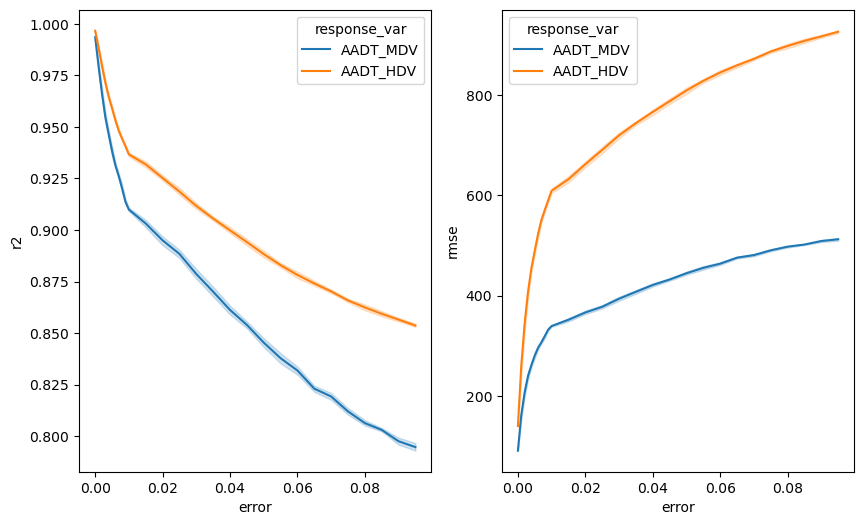

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.lineplot(data = df_Y, x = 'error', y = 'r2', hue = 'response_var', ax = ax[0])
sns.lineplot(data = df_Y, x = 'error', y = 'rmse', hue = 'response_var', ax = ax[1])

In [ ]:
df_X = pd.DataFrame(results_response_perturb)

In [ ]:
df_Y.to_csv('senstitivity_Y.csv', index = False)
df_X.to_csv('senstitivity_X.csv', index = False)